In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [2]:
def decode_eventid(eventid):
    """
    assume encoding from fuel_up_nukecc.py, etc.
    """
    eventid = str(eventid)
    phys_evt = eventid[-2:]
    eventid = eventid[:-2]
    gate = eventid[-4:]
    eventid = eventid[:-4]
    subrun = eventid[-4:]
    eventid = eventid[:-4]
    run = eventid
    return (run, subrun, gate, phys_evt)

In [3]:
f = h5py.File('../hdf5/minosmatch_nukecczdefs_genallzwitht_pcodecap66_127x94x47_xuv_me1Amc_0000.hdf5', 'r')

In [4]:
len(f['eventids'][:])

24999

In [5]:
runnums = [int(decode_eventid(eid)[0]) for eid in f['eventids'][:]]

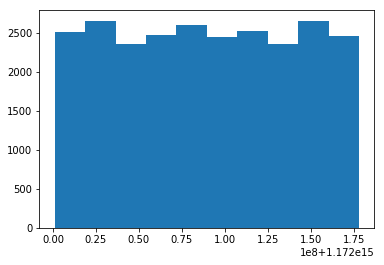

In [6]:
n, bins, patches = plt.hist(f['eventids'])

In [7]:
runnums[:10]

[117200,
 117200,
 117200,
 117200,
 117200,
 117200,
 117200,
 117200,
 117200,
 117200]

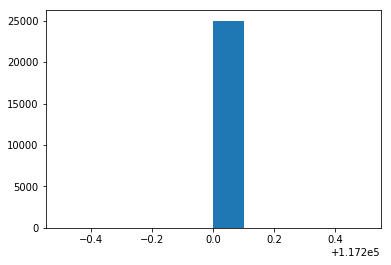

In [8]:
n, bins, patches = plt.hist(runnums)

In [9]:
any(np.array(runnums) == 112205)

False

In [10]:
for name in f:
    print name

eventids
hits-u
hits-v
hits-x
planecodes
segments
zs


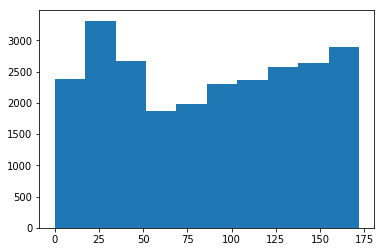

In [11]:
n, bins, patches = plt.hist(f['planecodes'])

In [12]:
np.min(f['planecodes']), np.max(f['planecodes'])

(0, 172)

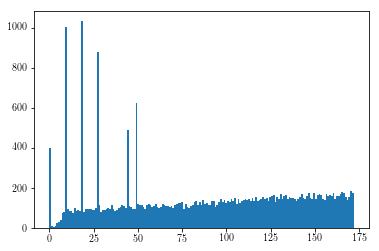

In [30]:
_, _, _ = plt.hist(f['planecodes'], bins=173, range=(0, 172))

In [14]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [15]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

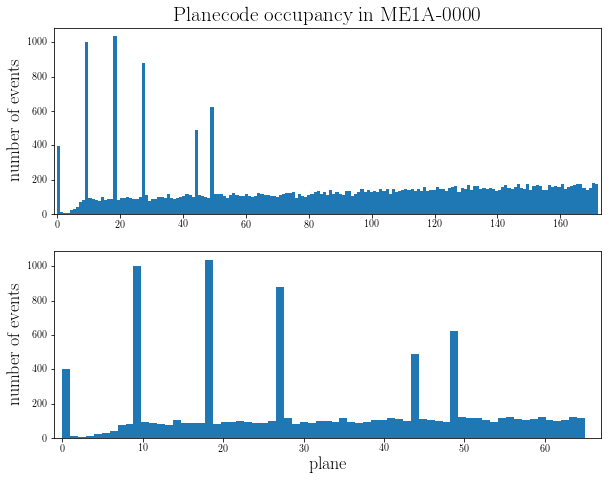

In [17]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(bottom=0.025, left=0.025, top=0.975, right=0.975)

ax1 = plt.subplot(2, 1, 1)
_, _, _ = plt.hist(f['planecodes'], bins=173, range=(0, 172))
plt.xlim(-1, 173)
plt.title('Planecode occupancy in ME1A-0000', fontsize=21)
plt.ylabel('number of events', fontsize=18)

ax2 = plt.subplot(2, 1, 2)
_, _, _ = plt.hist(f['planecodes'], bins=66, range=(0, 65))
plt.xlim(-1, 67)
plt.xlabel('plane', fontsize=18)
plt.ylabel('number of events', fontsize=18)

fig.savefig('planecode_occupancy_me1Amc_0000.pdf', bbox_inches='tight')

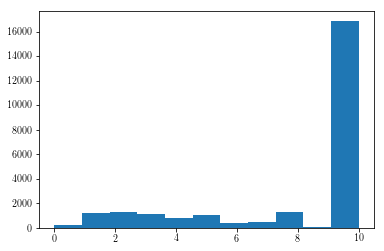

In [18]:
nums, bins, _ = plt.hist(f['segments'], bins=11, range=(0, 10))

In [19]:
new_nums = np.zeros_like(nums)
new_nums[0] = nums[0]
new_nums[1] = nums[1]
new_nums[2] = nums[6]
new_nums[3] = nums[2]
new_nums[4] = nums[7]
new_nums[5] = nums[3]
new_nums[6] = nums[8]
new_nums[7] = nums[4]
new_nums[8] = nums[9]
new_nums[9] = nums[5]
new_nums[10] = nums[10]

In [20]:
print(nums)
print(new_nums)

[   241.   1260.   1285.   1166.    791.   1023.    440.    471.   1307.
    110.  16905.]
[   241.   1260.    440.   1285.    471.   1166.   1307.    791.    110.
   1023.  16905.]


In [21]:
new_data = []
[new_data.extend([i] * int(new_nums[i])) for i in range(11)]
#new_data.extend([0] * 5)
#new_data

[None, None, None, None, None, None, None, None, None, None, None]

In [22]:
len(new_data)

24999

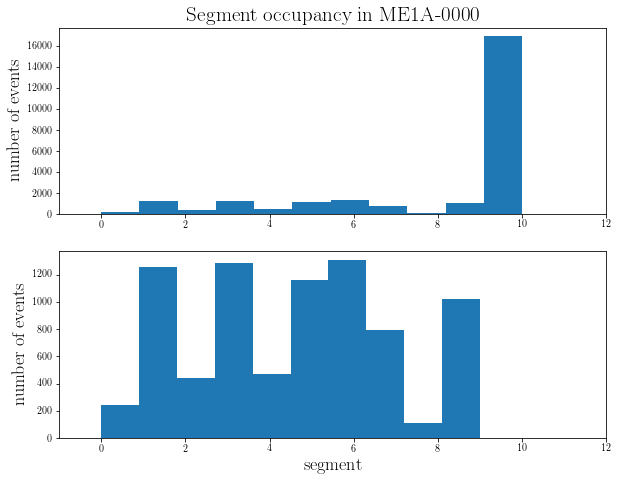

In [23]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(bottom=0.025, left=0.025, top=0.975, right=0.975)

ax1 = plt.subplot(2, 1, 1)
_, _, _ = plt.hist(new_data, bins=11, range=(0, 10))
plt.xlim(-1, 12)
plt.title('Segment occupancy in ME1A-0000', fontsize=21)
plt.ylabel('number of events', fontsize=18)

ax2 = plt.subplot(2, 1, 2)
_, _, _ = plt.hist(new_data, bins=10, range=(0, 9))
plt.xlim(-1, 12)
plt.xlabel('segment', fontsize=18)
plt.ylabel('number of events', fontsize=18)

fig.savefig('segment_occupancy_me1Amc_0000.pdf', bbox_inches='tight')

In [24]:
import plane_codes

In [25]:
plane_codes.build_reversed_indexed_codes()

{0: (-999, -999, -999),
 1: (-5, 1, 0),
 2: (-5, 2, 0),
 3: (-4, 1, 0),
 4: (-4, 2, 0),
 5: (-3, 1, 0),
 6: (-3, 2, 0),
 7: (-2, 1, 0),
 8: (-2, 2, 0),
 9: (-1, 0, 1),
 10: (0, 1, 0),
 11: (0, 2, 0),
 12: (1, 1, 0),
 13: (1, 2, 0),
 14: (2, 1, 0),
 15: (2, 2, 0),
 16: (3, 1, 0),
 17: (3, 2, 0),
 18: (4, 0, 2),
 19: (5, 1, 0),
 20: (5, 2, 0),
 21: (6, 1, 0),
 22: (6, 2, 0),
 23: (7, 1, 0),
 24: (7, 2, 0),
 25: (8, 1, 0),
 26: (8, 2, 0),
 27: (9, 0, 3),
 28: (11, 1, 0),
 29: (11, 2, 0),
 30: (12, 1, 0),
 31: (12, 2, 0),
 32: (13, 1, 0),
 33: (13, 2, 0),
 34: (14, 1, 0),
 35: (14, 2, 0),
 36: (15, 1, 0),
 37: (15, 2, 0),
 38: (16, 1, 0),
 39: (16, 2, 0),
 40: (17, 1, 0),
 41: (17, 2, 0),
 42: (18, 1, 0),
 43: (18, 2, 0),
 44: (19, 0, 4),
 45: (20, 1, 0),
 46: (20, 2, 0),
 47: (21, 1, 0),
 48: (21, 2, 0),
 49: (22, 0, 5),
 50: (23, 1, 0),
 51: (23, 2, 0),
 52: (24, 1, 0),
 53: (24, 2, 0),
 54: (25, 1, 0),
 55: (25, 2, 0),
 56: (26, 1, 0),
 57: (26, 2, 0),
 58: (27, 1, 0),
 59: (27, 2, 0),


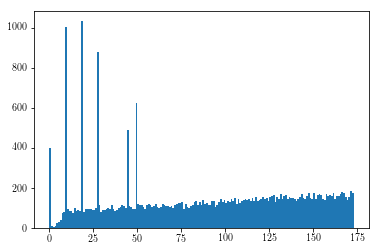

In [52]:
n, bins, patches = plt.hist(f['planecodes'], bins=np.arange(174))  # need 174 to see all?

In [32]:
planes = np.zeros(np.shape(f['planecodes']))
f['planecodes'].read_direct(planes)

(array([  399.,    12.,     6.,     9.,    23.,    30.,    39.,    73.,
           82.,  1002.,    94.,    87.,    83.,    75.,   102.,    85.,
           90.,    86.,  1034.,    80.,    93.,    93.,    97.,    96.,
           88.,    89.,    99.,   880.,   114.,    79.,    91.,    90.,
           97.,    99.,    95.,   115.,    94.,    87.,    92.,   102.,
          106.,   116.,   112.,    98.,   488.,   111.,   107.,    97.,
           93.,   624.,   120.,   115.,   115.,   103.,    94.,   114.,
          122.,   113.,   104.,   108.,   120.,   107.,    98.,   104.,
          122.,   115.,   110.,   110.,   103.,   108.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 70 Patch objects>)

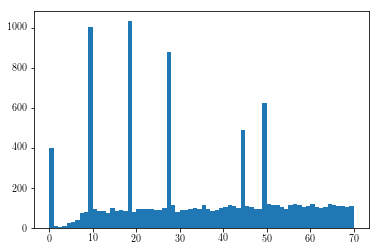

In [33]:
plt.hist(planes[planes < 70], bins=np.arange(71))  # last bins are `[67, 68), [68, 69), [69, 70)`

65
66


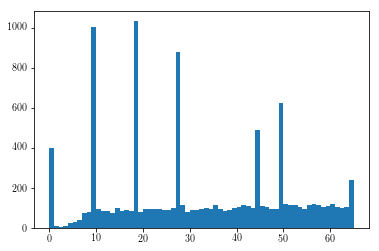

In [34]:
n, bins, _ = plt.hist(planes[planes < 66], bins=np.arange(66))
print len(n)
print len(bins)

In [35]:
print any(planes == 67)

True


In [36]:
print any(planes > 66)

True


In [37]:
print any(planes < 0)

False


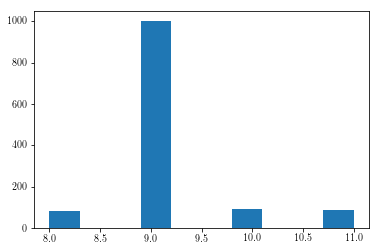

In [38]:
a = np.where(planes >= 8)
b = np.where(planes <= 11)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt1 == 9

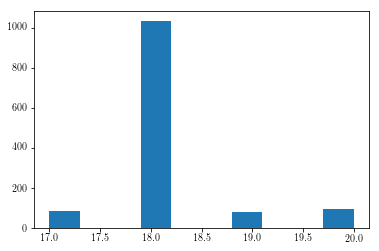

In [39]:
a = np.where(planes >= 17)
b = np.where(planes <= 20)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt2 == 18

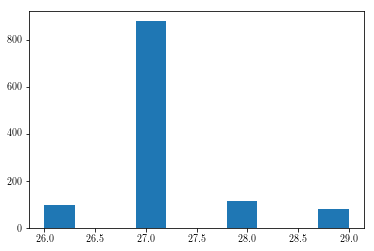

In [40]:
a = np.where(planes >= 26)
b = np.where(planes <= 29)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt3 == 27

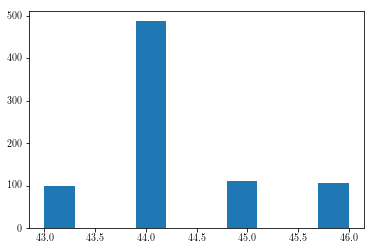

In [41]:
a = np.where(planes >= 43)
b = np.where(planes <= 46)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt4 == 44

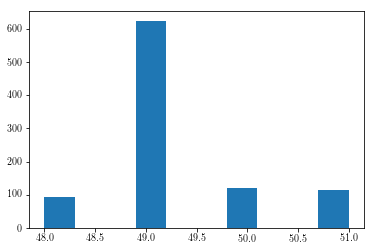

In [42]:
a = np.where(planes >= 48)
b = np.where(planes <= 51)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt5 == 49

In [43]:
segments = np.zeros(np.shape(f['segments']))
f['segments'].read_direct(segments)

(array([   241.,   1260.,   1285.,   1166.,    791.,   1023.,    440.,
           471.,   1307.,    110.,  16905.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

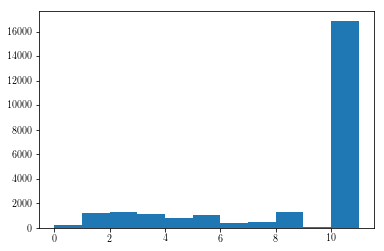

In [44]:
plt.hist(segments, bins=np.arange(12))

In [45]:
print np.min(planes)
print np.max(planes)

0.0
172.0
